<a href="https://colab.research.google.com/github/naiilard/Simulasi-AR-2-/blob/main/simulasiAR(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pendahuluan

# Berikut model AR(2)
"""
Y_t = phi1 * Y_(t-1) + phi2 * Y_(t-1) + epsilon_t
Y_t     : nilai observasi pada waktu t
Y_(t-1) : nilai observasi pada waktu t-1
Y_(t-2) : nilai onserbasi pada waktu t-2
phi1    : parameter AR(2) untuk lag waktu 1
phi2    : parameter AR(2) untuk lag waktu 2
t       : banyak data observasi
"""
# Estimasi parameter menggunakan metrode Least Square
"""
B = (X^T * X)^-1 * X^T * Y
X   : matriks berisi Y_(t-1) dan Y_(t-2)
X^T : invers matriks X
Y   : matriks kolom Y_t
"""

In [1]:
# Module yang digunakan

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Penentuan nilai parameter model yang stasioner

# Input nilai parameter
phi1 = float(input("Masukkan nilai phi1 (antara -1 dan 1): "))
phi2 = float(input("Masukkan nilai phi2 (antara -1 dan 1): "))

# Kondisi stasioner
if -1 < phi1 < 1 and -1 < phi2 < 1 and phi1 + phi2 < 1 and phi1 - phi2 < 1:
    print(f"Parameter phi1 = {phi1}, phi2 = {phi2} memenuhi kondisi stasioner")
else:
    print("Parameter tidak memenuhi kondisi stasioner!")

Masukkan nilai phi1 (antara -1 dan 1): 0.2
Masukkan nilai phi2 (antara -1 dan 1): 0.6
Parameter phi1 = 0.2, phi2 = 0.6 memenuhi kondisi stasioner


In [3]:
# Inisialisasi simulasi model AR(2)

t_values = np.arange(20, 301, 1) # Rentang data dari 20 hingga 300 dengan step 1
iterasi = 1000
toleransi = 0.005 # Batas nilai MSE

# Inisialiasi untuk menyimpan nilai MSE
mse_phi1 = []
mse_phi2 = []

# Simulasi monte carlo
for t in t_values:

    # Inisialisasi untuk menyimpan estimasi phi1 dan phi2
    phi1_est = []
    phi2_est = []

    for _ in range(iterasi):

        # Proses membangkitkan data Y_t
        Y = np.zeros(t)
        epsilon = np.random.normal(0, 1, t)

        for tt in range(2, t):

            # Model AR(2)
            Y[tt] = phi1 * Y[tt-1] + phi2 * Y[tt-2] + epsilon[tt]

        # Estimasi parameter menggunakan Least Square
        X = np.column_stack((Y[1:t-1], Y[0:t-2]))
        y = Y[2:]
        XtX_inv = np.linalg.pinv(X.T @ X) # (X^T * X)^-1
        XtY = X.T @ y # (X^T * y)
        B = XtX_inv @ XtY

        # Menyimpan estimasi parameter
        phi1_est.append(B[0])
        phi2_est.append(B[1])

    # Mengitung nilai MSE phi1 dan phi2
    mse_phi1.append(np.mean((phi1 - np.array(phi1_est))**2))

    mse_phi2.append(np.mean((phi2 - np.array(phi2_est))**2))

# Menampilkan hasil estimasi parameter
print("Estimasi parameter phi1:")
for t, phi1_est in zip(t_values, phi1_est):
    print(f"t = {t}: phi1_est = {phi1_est}")

print("\nEstimasi parameter phi2:")
for t, phi2_est in zip(t_values, phi2_est):
    print(f"t = {t}: phi2_est = {phi2_est}")

# Menampilkan nilai MSE
print("Nilai MSE untuk phi1:")
for t, mse in zip(t_values, mse_phi1):
    print(f"t = {t}: MSE = {mse}")

print("\nNilai MSE untuk phi2:")
for t, mse in zip(t_values, mse_phi2):
    print(f"t = {t}: MSE = {mse}")

# Mencari nilai t_min yang memenuhi batas epsilon
t_min_phi1 = None
t_min_phi2 = None

for i, mse1 in enumerate(mse_phi1):
    if mse1 <= toleransi:
        t_min_phi1 = t_values[i]
        break

for i, mse2 in enumerate(mse_phi2):
    if mse2 <= toleransi:
        t_min_phi2 = t_values[i]
        break

# Menampilkan hasil t_min untuk phi1 dan phi2
if t_min_phi1 is not None:
    print(f"Nilai t minimum untuk phi1 yang memenuhi batas epsilon = {toleransi} adalah {t_min_phi1}.")
else:
    print(f"Tidak ada t minimum untuk phi1 yang memenuhi batas epsilon = {toleransi}.")

if t_min_phi2 is not None:
    print(f"Nilai t minimum untuk phi2 yang memenuhi batas epsilon = {toleransi} adalah {t_min_phi2}.")
else:
    print(f"Tidak ada t minimum untuk phi2 yang memenuhi batas epsilon = {toleransi}.")

Estimasi parameter phi1:
t = 20: phi1_est = 0.10616817246762815
t = 21: phi1_est = 0.3111914782997
t = 22: phi1_est = 0.1431558875845324
t = 23: phi1_est = 0.17502142176236185
t = 24: phi1_est = 0.2350892358879642
t = 25: phi1_est = 0.11777280585594661
t = 26: phi1_est = 0.24299815344047643
t = 27: phi1_est = 0.19403528786706764
t = 28: phi1_est = 0.20926536746199964
t = 29: phi1_est = 0.18483149636707813
t = 30: phi1_est = 0.2514874225383833
t = 31: phi1_est = 0.2622800411437503
t = 32: phi1_est = 0.2446652709490218
t = 33: phi1_est = 0.12555283135111348
t = 34: phi1_est = 0.22155111215960824
t = 35: phi1_est = 0.27753549006057593
t = 36: phi1_est = 0.25273355135132175
t = 37: phi1_est = 0.16152958503980588
t = 38: phi1_est = 0.13490782254099135
t = 39: phi1_est = 0.16267235528876128
t = 40: phi1_est = 0.2692219759535815
t = 41: phi1_est = 0.24321962731400068
t = 42: phi1_est = 0.18425780284031262
t = 43: phi1_est = 0.10558748801394108
t = 44: phi1_est = 0.18404017869355468
t = 45: ph

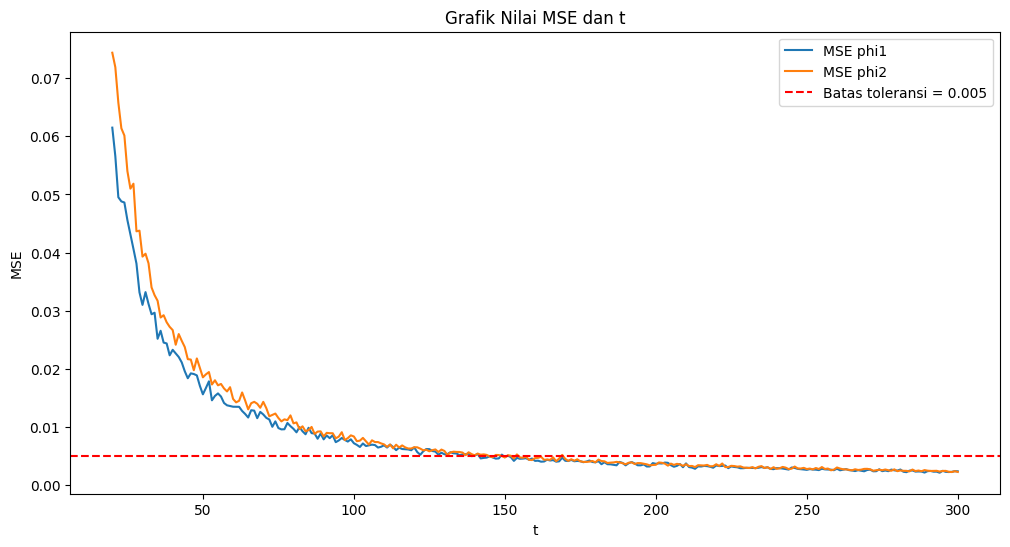

In [4]:
# Menampilkan grafik nilai MSE dan t
plt.figure(figsize=(12, 6))
plt.plot(t_values, mse_phi1, label='MSE phi1')
plt.plot(t_values, mse_phi2, label='MSE phi2')
plt.axhline(y = toleransi, color='red', linestyle='--', label=f'Batas toleransi = {toleransi}')
plt.xlabel('t')
plt.ylabel('MSE')
plt.title('Grafik Nilai MSE dan t')
plt.legend()
plt.show()

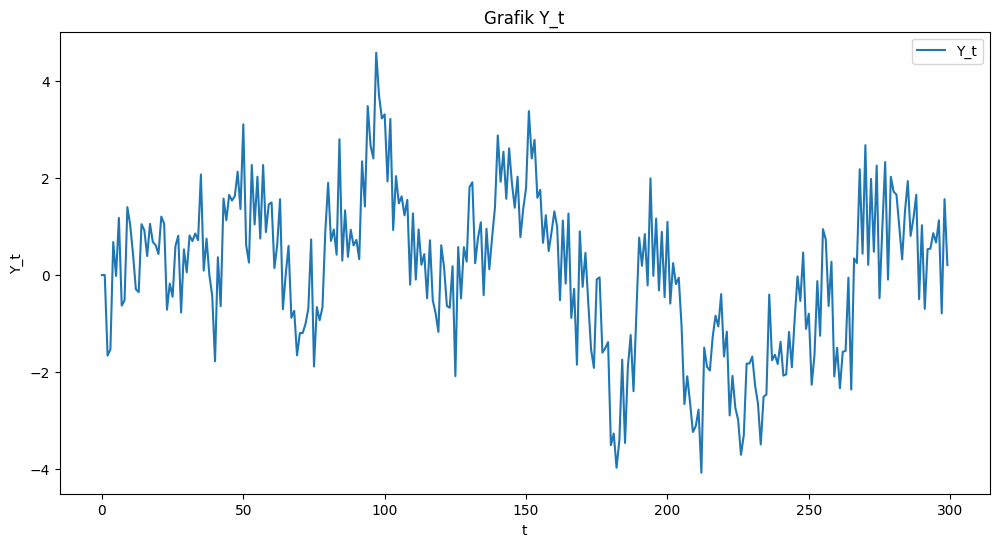

In [5]:
# Menampilkan grafik Yt
plt.figure(figsize=(12, 6))
plt.plot(range(t), Y, label='Y_t')
plt.xlabel('t')
plt.ylabel('Y_t')
plt.title('Grafik Y_t')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Grafik Y_t')

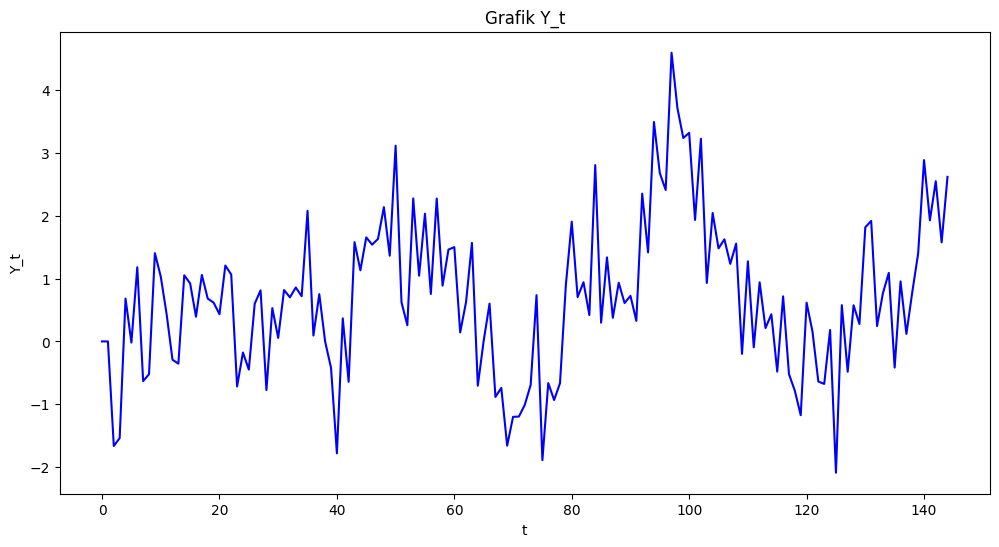

In [7]:
# Menampilkan Yt dengan t minimum
plt.figure(figsize=(12, 6))
plt.plot(range(t_min_phi2), Y[:t_min_phi2], label='Y_t', color = 'blue')
plt.xlabel('t')
plt.ylabel('Y_t')
plt.title('Grafik Y_t')